In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from strategy import *

%matplotlib inline

bt version :  (0, 2, 10)


In [2]:
# 투자자산
tickers = ['TQQQ','TMF']
safe_ticker = ['BIL']

In [3]:
data = yf.download(tickers+safe_ticker, end='2022-12-10')['Adj Close']
data = data[tickers+safe_ticker]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()
    
start_day = assets.index.min() + pd.DateOffset(months=12)
print('assets \n', assets)
print('start day : ', start_day)

[*********************100%***********************]  3 of 3 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
BIL 2007-05-30 00:00:00
assets 
                  TQQQ        TMF        BIL
Date                                       
2010-02-11   0.429243   6.660956  86.303886
2010-02-12   0.431001   6.736332  86.303886
2010-02-16   0.447695   6.796631  86.303886
2010-02-17   0.455292   6.579122  86.247437
2010-02-18   0.463924   6.467135  86.285080
...               ...        ...        ...
2022-12-05  22.115219   9.182485  91.179413
2022-12-06  20.712500   9.540632  91.209328
2022-12-07  20.463791  10.177337  91.209328
2022-12-08  21.190022  10.107697  91.269150
2022-12-09  20.782137   9.331713  91.259178

[3231 rows x 3 columns]
start day :  2011-02-11 00:00:00


In [4]:
# 절대모멘텀 백테스트
def AbsoluteMomentum_BT(assets, rank, months, start_day, run_on_end_of_period=False, lag=1, name='Absolute Momentum'):
    s = bt.Strategy(name, [bt.algos.RunAfterDate(start_day),
                           #bt.algos.RunMonthly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           bt.algos.RunQuarterly(run_on_first_date=False, run_on_end_of_period=run_on_end_of_period, run_on_last_date=False),
                           #bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}'),
                           #bt.algos.PrintDate(),
                           SelectAbsoluteMomentum(rank=rank, lookback=pd.DateOffset(months=months), lag=pd.DateOffset(days=lag)),
                           bt.algos.WeighEqually(),
                           #bt.algos.PrintTempData(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, assets, initial_capital=10000.0)

In [5]:
# 절대모멘텀 TQQQ (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers[0]].to_frame(), 1, i+1, start_day, False, 1, name='{}({})'.format(tickers[0],str(i+1)))
    
am_report = bt.run(*absolutemomentum.values())

Stat                 TQQQ(1)     TQQQ(2)     TQQQ(3)     TQQQ(4)     TQQQ(5)     TQQQ(6)     TQQQ(7)     TQQQ(8)     TQQQ(9)     TQQQ(10)    TQQQ(11)    TQQQ(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -40.39%     147.83%     240.24%     1686.06%    174.97%     338.01%     343.87%     349.16%     530.60%     189.66%     118.00%     103.33%
Daily Sharpe         0.12

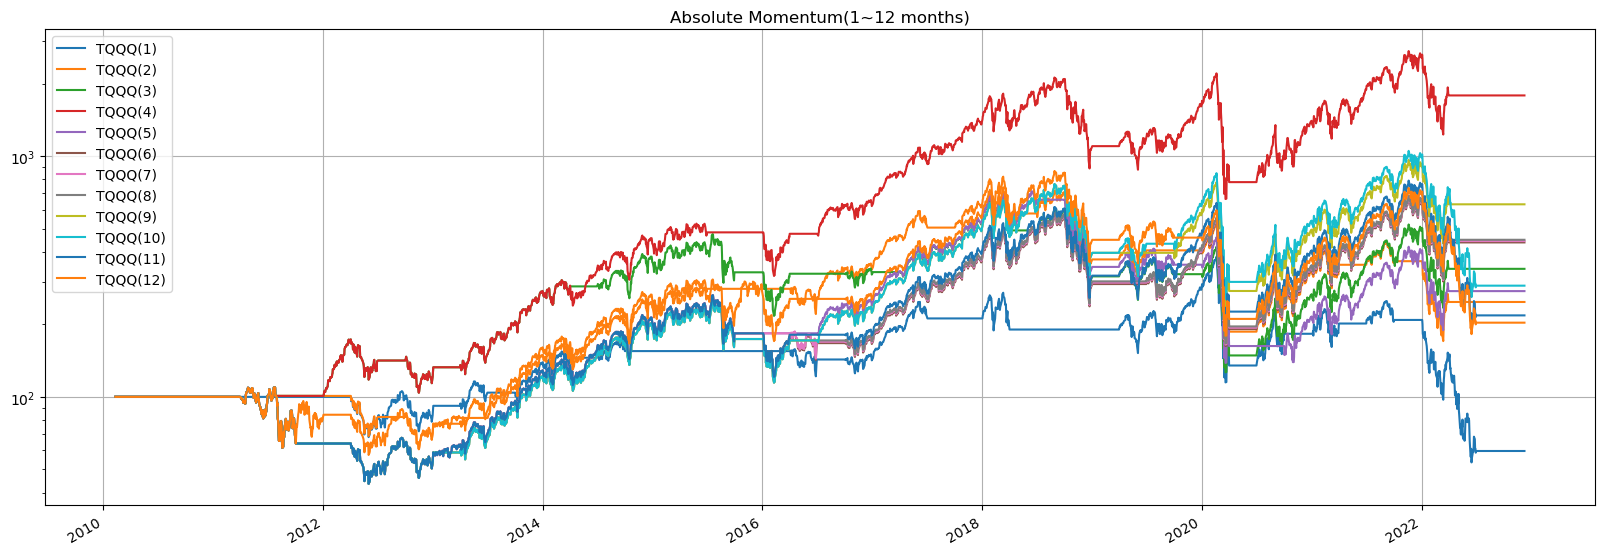

In [6]:
am_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months)')
am_report.set_date_range(start=start_day)
am_report.display()

In [7]:
# 절대모멘텀 상위 1종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 1, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am1_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -65.13%     210.10%     493.61%     548.48%     154.38%     74.37%      119.63%     52.81%      369.27%     -41.74%     -3.56%      -51.96%
Daily Sharpe         0.06  

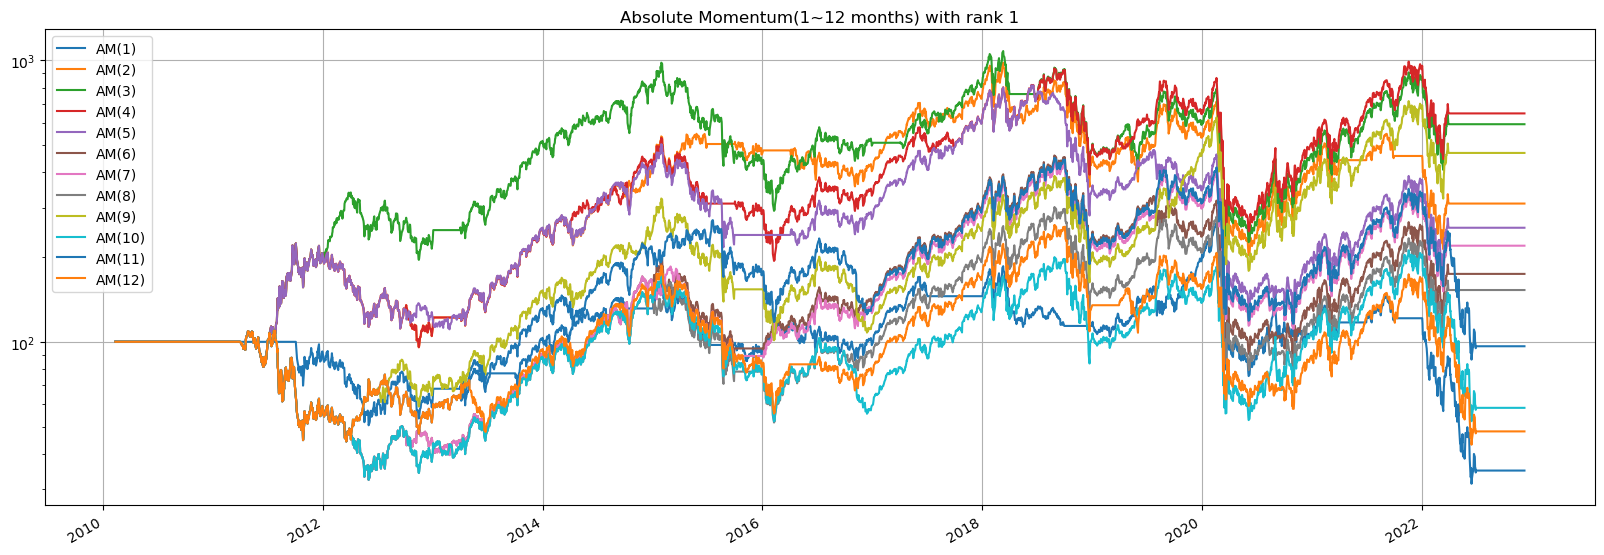

In [8]:
am1_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 1')
am1_report.set_date_range(start=start_day)
am1_report.display()
#am1_report.prices[start_day:].calc_stats().display()


In [9]:
am1_report.get_transactions('AM(4)')

price  quantity
Date       Security                     
2011-04-01 TQQQ       0.881125   11349.0
2011-07-01 TMF        7.954384    1268.0
           TQQQ       0.889394  -11349.0
2012-04-02 TMF       13.084848   -1268.0
           TQQQ       1.274447   13024.0
2012-07-02 TMF       18.424252     736.0
           TQQQ       1.041968  -13024.0
2012-10-01 TMF       17.675505    -736.0
           TQQQ       1.248295   10430.0
2013-01-02 TQQQ       1.170147  -10430.0
2013-04-01 TQQQ       1.235890    9875.0
2014-04-01 TMF       12.029402    2198.0
           TQQQ       2.678520   -9875.0
2014-10-01 TMF       16.196079   -2198.0
           TQQQ       3.406398   10453.0
2015-01-02 TMF       20.360456    2052.0
           TQQQ       3.997621  -10453.0
2015-07-01 TMF       15.103328   -2052.0
2015-10-01 TMF       18.489462    1676.0
2016-01-04 TMF       17.545938   -1676.0
           TQQQ       4.436500    6631.0
2016-04-01 TMF       21.877899    1326.0
           TQQQ       4.376932   -6631.0
2016-10-03 TMF       25.124004   -1326.0
           TQQQ       5.307253    6280.0
2017-07-03 TMF       19.070148    2588.0
           TQQQ       7.859533   -6280.0
2017-10-02 TMF       19.070148   -2588.0
           TQQQ       9.478595    5207.0
2019-01-02 TMF       18.432003    2637.0
           TQQQ       9.337313   -5207.0
2020-01-02 TMF       25.288105   -2637.0
           TQQQ      22.592741    2952.0
2020-04-01 TMF       41.532639     737.0
           TQQQ      10.378633   -2952.0
2020-07-01 TMF       38.365536    -737.0
           TQQQ      25.154446    1125.0
2022-04-01 TQQQ      57.630890   -1125.0

In [10]:
# 절대모멘텀 상위 2종목 (1~12개월 비교)
absolutemomentum = {}
for i in range(0, 12):   
    absolutemomentum[i] = AbsoluteMomentum_BT(assets[tickers], 2, i+1, start_day, False, 1, name='AM({})'.format(str(i+1)))
    
am2_report = bt.run(*absolutemomentum.values())

Stat                 AM(1)       AM(2)       AM(3)       AM(4)       AM(5)       AM(6)       AM(7)       AM(8)       AM(9)       AM(10)      AM(11)      AM(12)
-------------------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11  2011-02-11
End                  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09  2022-12-09
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         -77.06%     160.41%     560.19%     694.95%     105.54%     844.74%     447.28%     486.18%     940.78%     297.14%     89.98%      24.63%
Daily Sharpe         -0.05  

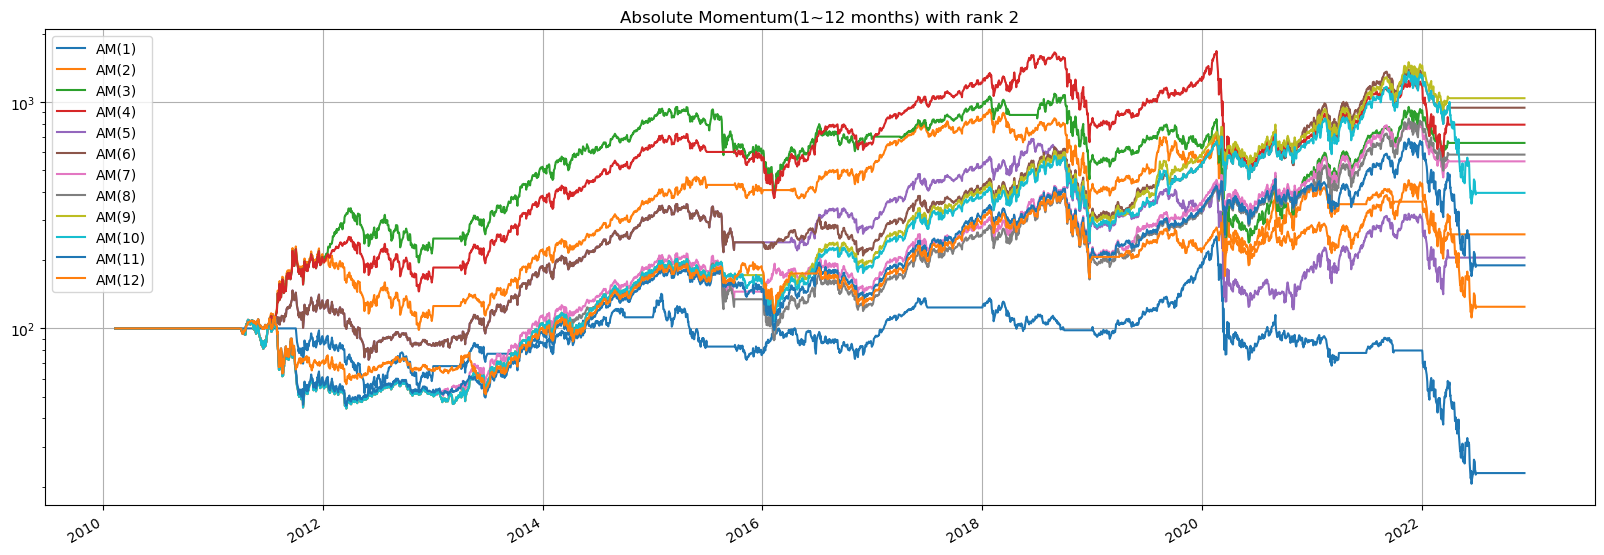

In [11]:
am2_report.plot(figsize=(20,7), grid=True, logy=True, title='Absolute Momentum(1~12 months) with rank 2')
am2_report.set_date_range(start=start_day)
am2_report.display()
#am1_report.prices[start_day:].calc_stats().display()